<a href="https://colab.research.google.com/github/akibmir90/Machine-Learning-Deep-Learning/blob/main/Lead%20Scoring%20Random%20Forest%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lead Scoring Model
#### A lead scoring model is a process of assigning a numerical score to a lead, which indicates the likelihood that the lead will convert into a customer. It is a method used by sales and marketing teams to prioritize leads based on their potential to generate revenue.

#### We will try to model the lead scores based on the inout features like budget, lease, room_type, datetime, etc. 

##Import necessary libraries

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
import numpy as np
from imblearn.over_sampling import SMOTE
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

### Data Import

In [42]:
df = pd.read_csv('/content/Assignment.csv', encoding = 'unicode_escape')

#### Here The 'unicode_escape' encoding maps non-ASCII characters to their Unicode code point, represented as a backslash followed by one or more hexadecimal digits. This makes it possible to represent characters from any language or writing system in a portable and ASCII-compatible way.

In [43]:
df

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...,NaN,NaN,NaN,NaN
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...,NaN,NaN,NaN,NaN
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31-08-2022,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...,NaN,NaN,NaN,NaN
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...,NaN,NaN,NaN,NaN
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46605,1134c0a7d44fdae1afd7f1f64e2789496784095ca0a050...,LOST,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,20-09-2022,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,d9e0f455b68a6573544ffac32292541a510fe2daffe2bb...,NaN,NaN,NaN,NaN
46606,8b8b029f1142f5cbc825aa6cbee01406c915c6b055db79...,LOST,Low availability,1108,294,30-08-2022,d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e2...,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,b936ee09e20b3b2234907cde349cda1c1a5327c4a486bf...,7f3fa48ca885678134842fa7456f3ece53a97f843b6101...,abb8e2badd5b6265c3237170cc599257a4f566706715d2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1f90dbad4873cb9673ff3c7ec69fbac4289181453c6cea...,NaN,NaN,NaN,NaN
46607,1ea65ea38f2f574b3875ba895e4ff76b284b7725041612...,LOST,Low availabilit

### Let us check from NaN values

In [52]:
df.isna().any()

Agent_id          True
status            True
lost_reason       True
budget            True
lease             True
movein            True
source            True
source_city       True
source_country    True
utm_source        True
utm_medium        True
des_city          True
des_country       True
room_type         True
lead_id           True
Unnamed: 15       True
Unnamed: 16       True
Unnamed: 17       True
Unnamed: 18       True
dtype: bool

### We we select only usefull attributes for model training and try to remove the columns and rows with NaN values.
#### We will select the status, budget, lease, movein, and room type from all the columns in dataframe


In [59]:
df = df[['status','budget','lease','movein','room_type']]

#### We have a date column in our dataframe and we will convert it into datetime and extract some usefull features from it

In [60]:
df['movein'] = pd.to_datetime(df['movein'])

In [61]:
print(df['movein'].dtype)

datetime64[ns]


### Checking the percentage of NaN values in each column

In [66]:
nan_counts = df.isna().sum()

In [67]:
percent_nans = 100 * nan_counts / len(df)

In [69]:
percent_nans

status            0.004291
budget            7.942502
lease             5.026818
movein           29.264106
room_type        50.523493
day_of_week      29.264106
month_of_year    29.264106
dtype: float64

#### So there is a lot of missing data in the dataframe. Although there are various approaches of dealing with the missing or NaN values. We will use Mode imputation for the cases where the missing percent is less than 30% and if it is greater than 30%, we will drop the column. We can also impute the column but the results may not be accuratly interpreted beacuse of the bias included


In [83]:
df['status'].fillna(df['status'].mode()[0], inplace=True)
df['budget'].fillna(df['budget'].mode()[0], inplace=True)
df['lease'].fillna(df['lease'].mode()[0], inplace=True)

In [80]:
df['movein'] = df['movein'].fillna(method='ffill').fillna(method='bfill')

In [85]:
df['day_of_week'] = df['movein'].dt.dayofweek
df['month_of_year'] = df['movein'].dt.month

In [86]:
df.isna().sum()

status               0
budget               0
lease                0
movein               0
room_type        23549
day_of_week          0
month_of_year        0
dtype: int64

In [87]:
df.drop('room_type', axis = 1, inplace = True)

In [88]:
df

,status,budget,lease,movein,day_of_week,month_of_year
0,LOST,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,2022-08-31,2,8
1,LOST,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,2022-08-31,2,8
2,LOST,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,2022-08-31,2,8
3,LOST,0-0,0,2022-08-31,2,8
4,LOST,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,2022-08-31,2,8
...,...,...,...,...,...,...
46605,LOST,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,2022-09-20,1,9
46606,LOST,1108,294,2022-08-30,1,8
46607,LOST,£181 - £240 Per Week,Full Year Course Stay 40 - 44 weeks,2022-01-09,6,1
46608,LOST,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,2022-01-09,6,1


#### Let us convert the day of week and month of year into categories as:

In [96]:
df['month_of_year'] = pd.to_datetime(df['month_of_year'], format='%m').dt.strftime('%B')
df['day_of_week'] = pd.to_datetime(df['day_of_week'], format='%d').dt.strftime('%A')

In [97]:
df

,status,budget,lease,movein,day_of_week,month_of_year
0,LOST,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,2022-08-31,Wednesday,August
1,LOST,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,2022-08-31,Wednesday,August
2,LOST,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,2022-08-31,Wednesday,August
3,LOST,0-0,0,2022-08-31,Wednesday,August
4,LOST,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,2022-08-31,Wednesday,August
...,...,...,...,...,...,...
46605,LOST,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,2022-09-20,Tuesday,September
46606,LOST,1108,294,2022-08-30,Tuesday,August
46607,LOST,£181 - £240 Per Week,Full Year Course Stay 40 - 44 weeks,2022-01-09,Sunday,January
46608,LOST,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,2022-01-09,Sunday,January


#### Visualize the categories counts in the dataframe colums

In [99]:
df['status'].unique()

array(['LOST', 'WON', 'OPPORTUNITY', 'CONTACTED', 'PROCESSING',
       'IMPORTANT'], dtype=object)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='count'>

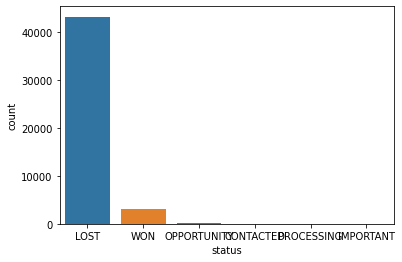

In [101]:
sns.countplot(df['status'])

#### As 'status' is the target attribute and we only need if the customer is LOST or WON. We can delete all other values. Also there number is very less

In [105]:
selected_values = ['OPPORTUNITY', 'CONTACTED','PROCESSING','IMPORTANT']
df = df[~df['status'].isin(selected_values)]

In [106]:
df['status'].unique()

array(['LOST', 'WON'], dtype=object)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='count'>

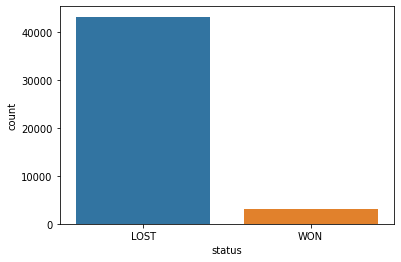

In [107]:
sns.countplot(df['status'])

## Upon visualizing the target values, we can see a big issue here which is the imbalanced data and it is highly imbalanced because the 'LOST' target is highly dominating the 'WON' output.

In [109]:
df['budget'].unique()

array(['£60 - £120 Per week', '£121 - £180 Per Week', '0-0', ...,
       '400 Per Week', '0-115 or 120', '0-500 PCM'], dtype=object)

#### The budget column has a large number of categories and we will have to clean the column and replace the similar categories into some primary values

In [120]:
categories = {
    '£60 - £120 Per Week': lambda x: 60 <= x <= 120,
    '£121 - £180 Per Week': lambda x: 121 <= x <= 180,
    '£181- £240 Per Week': lambda x: 181 <= x <= 240,
    '£240 - £300 Per Week': lambda x: 241 <= x <= 300,
    '> £300': lambda x: x > 300
}

# loop through the DataFrame and assign new categories where appropriate
for index, row in df.iterrows():
    value = row['budget']
    
    if isinstance(value, str):
        # if the value is already a string, skip it
        continue
    
    for category, function in categories.items():
        if function(value):
            # if the value falls within the category, assign the category
            df.at[index, 'budget'] = category
            break

In [121]:
df['budget'] = df['budget'].str.lower()

In [122]:
df

,status,budget,lease,movein,day_of_week,month_of_year
0,LOST,£60 - £120 per week,Full Year Course Stay 40 - 44 weeks,2022-08-31,Wednesday,August
1,LOST,£60 - £120 per week,Full Year Course Stay 40 - 44 weeks,2022-08-31,Wednesday,August
2,LOST,£121 - £180 per week,Full Year Course Stay 40 - 44 weeks,2022-08-31,Wednesday,August
3,LOST,0-0,0,2022-08-31,Wednesday,August
4,LOST,£60 - £120 per week,Full Year Course Stay 40 - 44 weeks,2022-08-31,Wednesday,August
...,...,...,...,...,...,...
46605,LOST,£241 - £300 per week,Full Year Course Stay 40 - 44 weeks,2022-09-20,Tuesday,September
46606,LOST,1108,294,2022-08-30,Tuesday,August
46607,LOST,£181 - £240 per week,Full Year Course Stay 40 - 44 weeks,2022-01-09,Sunday,January
46608,LOST,£60 - £120 per week,Full Year Course Stay 40 - 44 weeks,2022-01-09,Sunday,January


In [127]:
pd.Series(df['budget']).value_counts().head(25)

£60 - £120 per week     13447
£121 - £180 per week     8878
0-0                      5719
£181 - £240 per week     2143
100                      1509
150                      1087
£241 - £300 per week      709
> 300£ per week           693
200                       643
120                       550
130                       417
160                       385
110                       377
180                       359
140                       358
250                       314
170                       288
500                       276
300                       268
190                       223
0-100                     217
220                       144
80                        119
0-150                     111
60                        109
Name: budget, dtype: int64

### We can see that we are dealing with very unclean data and we will try to preserve as much as possible. Let us try mapping for replacing the values

In [129]:
df['budget'] = df['budget'].replace({'150':'£121 - £180 per week','0-0':'no budget','100':'£60 - £120 per week','200':'£181 - £240 per week ','60':'>£60','80':'>£60','120':'£60 - £120 per week','130':'£60 - £120 per week','250':'£241 - £300 per week'})

In [131]:
pd.Series(df['budget']).value_counts()

£60 - £120 per week     15923
£121 - £180 per week     9965
no budget                5722
£181 - £240 per week     2143
£241 - £300 per week     1023
                        ...  
£120-160 per week           1
1400 per month              1
0-£80 - £90 per week        1
500 euros month             1
0-500 pcm                   1
Name: budget, Length: 1806, dtype: int64

### Remove all other values as we have sufficient data for training and testing

In [132]:
selected_values = ['£60 - £120 per week','£121 - £180 per week','£181 - £240 per week','£241 - £300 per week','> 300£ per week','no budget']

In [133]:
df = df[df['budget'].isin(selected_values)]

In [138]:
pd.Series(df['budget']).value_counts()

£60 - £120 per week     15923
£121 - £180 per week     9965
no budget                5722
£181 - £240 per week     2143
£241 - £300 per week     1023
> 300£ per week           693
Name: budget, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='budget', ylabel='count'>

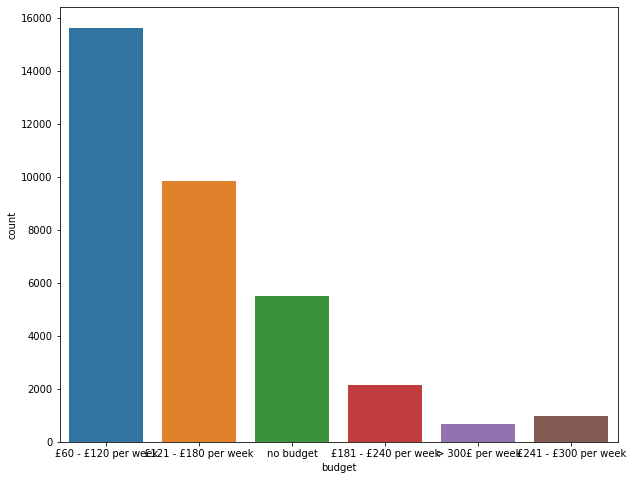

In [151]:
plt.figure(figsize = (10,8))
sns.countplot(df['budget'])

### Now we will clean the 'lease' column using same process as above

In [137]:
df['lease'] = df['lease'].str.lower()

<ipython-input-137-266c9f7314ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lease'] = df['lease'].str.lower()


In [143]:
pd.Series(df['lease']).value_counts().head(15)

full year course stay 40 - 44 weeks           12846
0                                              6479
complete education year stay 50 - 52 weeks     6139
semester stay 20 - 24 weeks                    2627
summer/short stay 8 - 12 weeks                 2163
other                                          1031
51                                              705
full-course-stay                                647
lease                                           575
full-year-stay                                  542
short-stay                                      343
semester-stay                                   312
51 weeks                                        207
44                                              130
44 weeks                                         81
Name: lease, dtype: int64

In [144]:
mapping = {'full year course stay 40 - 44 weeks': 'full year course stay', 'complete education year stay 50 - 52 weeks': 'complete education year stay', 'full-course-stay': 'full year course stay', '51 weeks': 'complete education year stay','full-year-stay':'full year course stay','semester stay 20 - 24 weeks':'semester stay','summer/short stay 8 - 12 weeks':'summer/short stay','semester-stay':'semester stay','short-stay':'summer/short stay','51':'complete education year stay','44':'full year course stay','51 weeks': 'complete education year stay','0':'no week stay'}

In [ ]:
df['lease'] = df['lease'].replace(mapping)

In [147]:
pd.Series(df['lease']).value_counts().head(10)

full year course stay           14165
complete education year stay     7051
no week stay                     6479
semester stay                    2941
summer/short stay                2506
other                            1031
lease                             575
44 weeks                           81
full year stay                     44
1 year                             38
Name: lease, dtype: int64

In [148]:
selected_values = ['full year course stay','other','complete education year stay','summer/short stay','semester stay','lease','no week stay']

In [149]:
df = df[df['lease'].isin(selected_values)]

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lease', ylabel='count'>

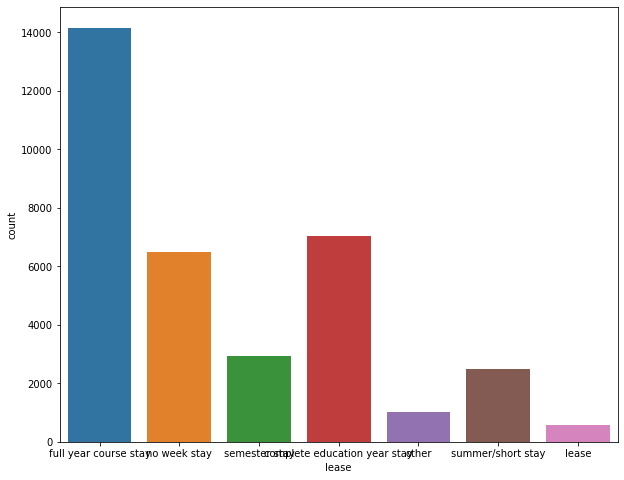

In [153]:
plt.figure(figsize=(10,8))
sns.countplot(df['lease'])

### We have almost cleaned the data. Now before training the model, we need to label encode the categorical columns and imbalanced target numbers

In [154]:
cat_features = ['budget', 'lease', 'day_of_week','month_of_year']

In [156]:
for feature in cat_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])

### We will first fit the model with unbalanced data and then try to resample the data to balance it and see the accuracy results

In [161]:
df.dtypes

status                   object
budget                    int64
lease                     int64
movein           datetime64[ns]
day_of_week               int64
month_of_year             int64
dtype: object

In [162]:
df['movein'] = df['movein'].astype(int)

<ipython-input-162-ca93ad458b89>:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['movein'] = df['movein'].astype(int)


In [163]:
df.dtypes

status           object
budget            int64
lease             int64
movein            int64
day_of_week       int64
month_of_year     int64
dtype: object

In [164]:
X = df.drop('status', axis=1)
y = df['status']

### Split into Train and Test

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Fitting

In [166]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [167]:
y_pred = rf.predict(X_test)

In [172]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6575   11]
 [ 364    0]]
              precision    recall  f1-score   support

        LOST       0.95      1.00      0.97      6586
         WON       0.00      0.00      0.00       364

    accuracy                           0.95      6950
   macro avg       0.47      0.50      0.49      6950
weighted avg       0.90      0.95      0.92      6950



### As already stated that the data is imbalanced and we have 'LOST' over dominating the other variable. It was expected that the model we predict the LOST values more often than the other.
## Now it becomes to balance the data before training with RF
### As the imbalance is very high, we have to deal with it properly. We can use Upsampling and Downsampling for minority adnd majority class respectively.

## Downsampling

In [174]:
# Separate majority and minority classes
majority_class = df[df['status'] == 'LOST']
minority_class = df[df['status'] == 'WON']

# Downsample majority class
majority_downsampled = resample(majority_class, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(minority_class),    # match minority class
                                 random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
balanced_df = pd.concat([majority_downsampled, minority_class])

In [175]:
balanced_df

,status,budget,lease,movein,day_of_week,month_of_year
20207,LOST,5,1,1660003200000000000,5,1
9084,LOST,5,0,1673049600000000000,2,4
7091,LOST,1,3,1694044800000000000,4,11
11661,LOST,5,0,1690502400000000000,0,5
27175,LOST,2,0,1667952000000000000,6,9
...,...,...,...,...,...,...
46470,WON,5,1,1663632000000000000,5,11
46474,WON,5,1,1641686400000000000,3,4
46480,WON,5,0,1660003200000000000,5,1
46586,WON,2,0,1652054400000000000,1,8


In [176]:
X = balanced_df.drop('status', axis=1)
y = balanced_df['status']

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [178]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [179]:
y_pred = rf.predict(X_test)

In [180]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[195 176]
 [118 230]]
              precision    recall  f1-score   support

        LOST       0.62      0.53      0.57       371
         WON       0.57      0.66      0.61       348

    accuracy                           0.59       719
   macro avg       0.59      0.59      0.59       719
weighted avg       0.60      0.59      0.59       719



### This seems unbiased and much better than the previous results.
## The F1 score is 0.6 which means that the model correctly identified 60% of the true positives while minimizing false positives and false negatives.

## Upsampling

In [181]:
# Separate majority and minority classes
majority_class = df[df['status'] == 'LOST']
minority_class = df[df['status'] == 'WON']

# Downsample majority class
minority_upsampled = resample(minority_class, 
                                 replace=True,    # sample without replacement
                                 n_samples=len(majority_class),    # match minority class
                                 random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
balanced_df2 = pd.concat([minority_upsampled, majority_class])

In [182]:
balanced_df2

,status,budget,lease,movein,day_of_week,month_of_year
30059,WON,2,0,1663632000000000000,5,11
38106,WON,2,1,1667952000000000000,6,9
25531,WON,2,1,1663545600000000000,1,11
33826,WON,2,0,1663372800000000000,2,11
30125,WON,2,0,1662681600000000000,0,11
...,...,...,...,...,...,...
46604,LOST,5,6,1664409600000000000,4,11
46605,LOST,4,1,1663632000000000000,5,11
46607,LOST,3,1,1641686400000000000,3,4
46608,LOST,5,1,1641686400000000000,3,4


In [183]:
X = balanced_df2.drop('status', axis=1)
y = balanced_df2['status']

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [185]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [186]:
y_pred = rf.predict(X_test)

In [187]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3955 2601]
 [1323 5302]]
              precision    recall  f1-score   support

        LOST       0.75      0.60      0.67      6556
         WON       0.67      0.80      0.73      6625

    accuracy                           0.70     13181
   macro avg       0.71      0.70      0.70     13181
weighted avg       0.71      0.70      0.70     13181



## Here Upsampling has increased the accuracy from 0.59 to 0.70 which is fantastic. The F1 score has been increased also

### We can also go for SMOTE which s a popular technique used in machine learning to address the class imbalance problem. In many real-world datasets, the number of instances belonging to one class (the minority class) is much smaller than the number of instances belonging to the other class (the majority class). This can lead to biased models that perform poorly in predicting the minority class.

In [192]:
X = df.drop('status', axis=1)
y = df['status']

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [194]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [195]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [196]:
y_pred = rf.predict(X_test)

In [197]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4152 2434]
 [ 174  190]]
              precision    recall  f1-score   support

        LOST       0.96      0.63      0.76      6586
         WON       0.07      0.52      0.13       364

    accuracy                           0.62      6950
   macro avg       0.52      0.58      0.44      6950
weighted avg       0.91      0.62      0.73      6950



### Here the results are not so good. Although SMOTE could have been the best procedure to balance the data than resampling. But Upsampling seems to be better than other methods and wins the competition here

# This is it. The accuracy could have been much better if the issue of imbalancing would have been absent.
#Thank You